In [2]:
import warnings
warnings.filterwarnings('ignore')
import json, os
import numpy as np
from monty.json import MontyDecoder, MontyEncoder
from copy import deepcopy
from scipy.spatial import distance_matrix
import sys
sys.path.append('..')

from phasemapy.dataio import InstanceData
from phasemapy.parser import ICDDEntry
from phasemapy.solver import Phase, Sample, Texture

chemsys = ['Bi', 'Cu', 'V']
oxide_system = True
photon_e = 13e3
max_q_shift = 0.03
resample_density = 1000
initial_alphagamma = 0.1
SUM_NORM = 6000
loss_weight = {'xrd_loss': 6.0, 'comp_loss': 2.0, 'entropy_loss': 0.01}

In [3]:
# 1.Load the instance data and ICDD entries pool in Bi-Cu-V system

#load instance data:307 instances
instance_data = InstanceData.from_json('./data/Instance_data_background_correction', chemsys, photon_e)
instance_data = instance_data.resample_xrd(resample_density)
#load entry pool: 64 ICDD entries
with open('./data/entries_dft_sno2.json') as f:
    entries = json.load(f, cls=MontyDecoder)
Phase.theta_to_q(entries)   

In [11]:
samples = []
for i in range(instance_data.sample_num):
    solution_file = f'solution/with_TextureAnalysis/samples{i}.json'
    with open(solution_file) as f:
        sample = json.load(f, cls=MontyDecoder)
    if sample.sample_id !=i:
        print (i)    
    samples.append(sample)

In [18]:
samples[2]._current_model

In [13]:
        samples[0].current_model=samples[0].current_model/sample.polarisation_factor
        samples[0].refine_all_fractions()
        samples[0].refine_one_by_one()

getting
setting
getting
getting
getting
getting
getting


In [15]:
        samples[1].current_model=samples[0].current_model/sample.polarisation_factor
        samples[1].refine_all_fractions()
        samples[1].refine_one_by_one()

getting
setting
getting
getting
getting
getting
getting


getting
getting
getting


<module 'matplotlib.pyplot' from 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\lib\\site-packages\\matplotlib\\pyplot.py'>

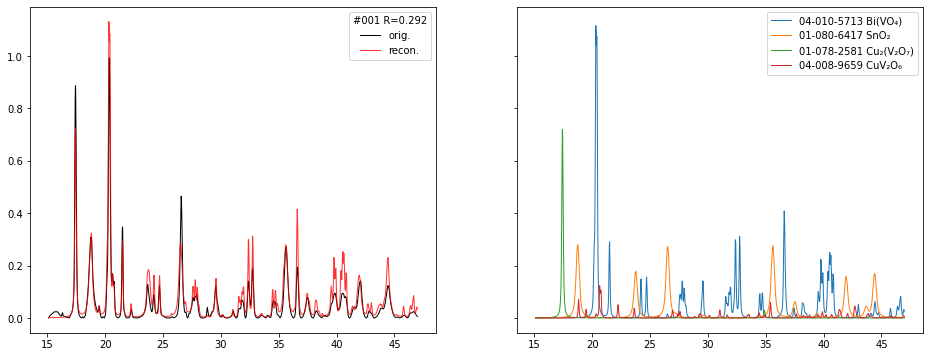

In [16]:
samples[1].plot(perphase=True)

In [27]:
new_samples = deepcopy(samples)
for sample in samples:
    print(i)
    for i in range(len(sample.current_model)):
        sample.current_model=sample.current_model/sample.polarisation_factor
        sample.refine_all_fractions()
        sample.refine_one_by_one()
#         sample.plot(perphase=True)
        new_samples[sample.sample_id]=sample
   


0
getting
getting
setting


ValueError: Value cannot be changed.

In [24]:
for sample in new_samples:    
    solution_file = f'solution/samples{sample.sample_id}.json'
    with open(solution_file, 'w') as f:
        json.dump(sample, f, cls=MontyEncoder)
        sample.plot(perphase=True, saveplot=f'solution_figures/sample_{sample.sample_id}.pdf')

0

getting


array([[0.000509, 0.000502, 0.000496, ..., 0.005139, 0.007207, 0.008031],
       [0.00029 , 0.000293, 0.000295, ..., 0.000585, 0.000623, 0.000677]])

In [6]:
samples[58].current_model/samples[58].polarisation_factor

getting


array([[0.000545, 0.000538, 0.000532, ..., 0.009216, 0.012936, 0.014428],
       [0.000311, 0.000313, 0.000316, ..., 0.00105 , 0.001118, 0.001217]])

In [18]:
samples[58].current_model=samples[58].current_model/samples[58].polarisation_factor


getting
setting


In [12]:
a=samples[58].current_model/samples[58].polarisation_factor


getting


In [19]:
samples[58].current_model

getting


array([[0.000545, 0.000538, 0.000532, ..., 0.009216, 0.012936, 0.014428],
       [0.000311, 0.000313, 0.000316, ..., 0.00105 , 0.001118, 0.001217]])

In [11]:
samples[58]._current_model

array([[0.000545, 0.000538, 0.000532, ..., 0.009216, 0.012936, 0.014428],
       [0.000311, 0.000313, 0.000316, ..., 0.00105 , 0.001118, 0.001217]])

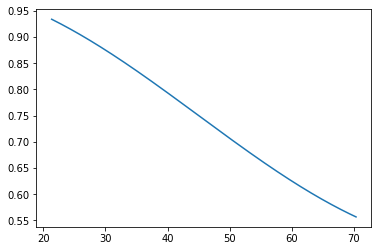

In [55]:
import matplotlib.pyplot as plt
plt.plot(twotheta,p)

In [28]:
class C(object):
    def __init__(self):
        self._x = 0

    @property
    def x(self):
        print ('getting')
        return self._x

    @x.setter
    def x(self, value):
        print ('setting')
        self._x = value

if __name__ == '__main__':
    c = C()
    print (c.x)
    c.x = 10
    print (c.x)
    

getting
0
setting
getting
10


In [87]:
%load_ext autoreload
%autoreload 2

In [ ]:
texture_groups = {}
new_samples = []

for i,sample in enumerate(samples[255:280]):  
    sample_copy = deepcopy(sample)
    print(i+255)
    for index, solution in enumerate(sample.solution):
        if solution.entry.structure:
            sample_texture = Texture(sample_copy,TC_cutoff=1.1,fraction_cutoff=0.0,solution=solution,solution_index=index)
    
            if sample_texture.preferred_orientation:
                print(sample_texture.entry.name)
                print(sample_texture.preferred_orientation)
                print(index)
                if f'{sample_texture.entry.chemical_formula}_{sample_texture.preferred_orientation}' in texture_groups.keys():
                    texture_group_one = texture_groups[f'{sample_texture.entry.chemical_formula}_{sample_texture.preferred_orientation}']
                else:
                    texture_group_one = sample_texture.get_texture_group()
                    texture_groups[f'{sample_texture.entry.chemical_formula}_{sample_texture.preferred_orientation}'] = texture_group_one
                                  
                sample_dup = sample_texture.optimize_by_texture(texture_group_one,plot=True) 
                sample_copy = deepcopy(sample_dup)
    
           
            
    new_samples.append(sample_copy)
    solution_file = f'solution/samples{i+255}.json'    
    with open(solution_file, 'w') as f:
        json.dump(new_samples[i], f, cls=MontyEncoder)

In [5]:
# new_samples = []
# for i in range(instance_data.sample_num):
#     solution_file = f'solution_without_texture/samples{i}.json'
#     with open(solution_file) as f:
#         sample = json.load(f, cls=MontyDecoder)
#     if sample.sample_id !=i:
#         print (i)    
#     new_samples.append(sample)

In [ ]:
comp_dist = distance_matrix(instance_data.sample_comp, instance_data.sample_comp)
nn_list = {i: np.where((comp_dist[i] < 0.15) & (comp_dist[i] > 0))[0] for i in range(instance_data.sample_num)}
for sample in samples:
    if True:
        # if min([count_act[_.entry_id] for _ in sample.entries])<5.0:
        if sample.R > 0.1:
            print(sample.sample_id, sample.loss(loss_weight))
            candidate_entries = []
            for i in nn_list[sample.sample_id]:
                candidate_entries += samples[i].entries
            candidate_entries = list(set(candidate_entries))
            solution = []
            for e in candidate_entries:
                phase = Phase.from_entry_and_instance_data(e, 1 / len(candidate_entries), instance_data)
                solution.append(phase)
    
            new_sample = deepcopy(sample)
            new_sample.solution = solution
            new_sample.refine_one_by_one()
            new_sample.refine_all_fractions()   
            new_sample.update_solution(0.01, 0.2999, new_sample.max_q_shift)            
            new_sample = new_sample.optimize(num_epoch=500, print_prog=True, loss_weight=loss_weight)
            new_sample.update_solution(0.01, 0.2999, new_sample.max_q_shift)  
           
            new_sample.refine_one_by_one() 
            new_sample.refine_all_fractions()          
            new_sample.update_solution(0.01, 0.2999, new_sample.max_q_shift) 
            new_sample.print_solution()           
            if new_sample.loss(loss_weight) :               
                new_sample.plot(perphase=True,Rwp=False)
                samples[sample.sample_id] = new_sample
                solution_file = f'solution/samples{sample.sample_id}.json'
                with open(solution_file, 'w') as f:
                    json.dump(samples[sample.sample_id], f, cls=MontyEncoder)
                    sample.plot(perphase=True, saveplot=f'solution_figures/sample_{sample.sample_id}.pdf',Rwp=False)

In [ ]:

for sample in samples:
    if True:
        # if min([count_act[_.entry_id] for _ in sample.entries])<5.0:
        if sample.R > 0.3:    
            new_sample = deepcopy(sample)            
            new_sample.refine_one_by_one(Rwp=False)
            new_sample.refine_all_fractions(Rwp=False)   
            new_sample.update_solution(0.05, 0.2999, new_sample.max_q_shift)            
#             new_sample = new_sample.optimize(num_epoch=500, print_prog=True, loss_weight=loss_weight)
#             new_sample.update_solution(0.01, 0.2999, new_sample.max_q_shift)  
           
#             new_sample.refine_one_by_one() 
#             new_sample.refine_all_fractions()          
#             new_sample.update_solution(0.05, 0.2999, new_sample.max_q_shift) 
            new_sample.print_solution()    
            new_sample.plot(perphase=True, Rwp=False)
            if new_sample.loss(loss_weight):
                sample.print_solution()
                new_sample.print_solution()                
#                 new_sample.plot(perphase=True)
                samples[sample.sample_id] = new_sample
                solution_file = f'solution/samples{sample.sample_id}.json'
                with open(solution_file, 'w') as f:
                    json.dump(samples[sample.sample_id], f, cls=MontyEncoder)
                    sample.plot(perphase=True, saveplot=f'solution_figures/sample_{sample.sample_id}.pdf')

In [16]:
for sample in samples:    
    solution_file = f'solution/samples{sample.sample_id}.json'
    with open(solution_file, 'w') as f:
        json.dump(sample, f, cls=MontyEncoder)
        sample.plot(perphase=True, saveplot=f'solution_figures/sample_{sample.sample_id}.pdf')

<module 'matplotlib.pyplot' from 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\lib\\site-packages\\matplotlib\\pyplot.py'>

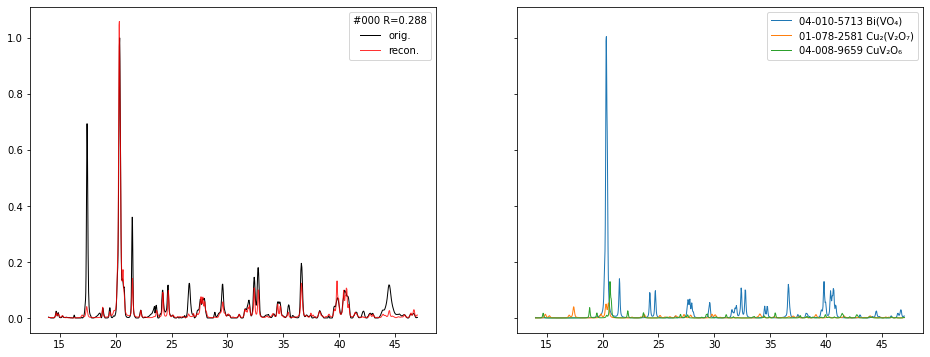

In [8]:
samples[0].plot(perphase=True)

In [13]:
for i,sample in enumerate(samples):
    sample_texture = Texture(sample, TC_cutoff = 1.3)
    print(i)
    print(sample_texture.entry.chemical_formula)
    print(sample_texture.preferred_orientation)

0
Bi(VO4)
[1, 1, 2]
1
Bi(VO4)
[1, 1, 2]
2
Bi(VO4)
[1, 1, 2]
3
Bi(VO4)
[1, 1, 2]
4
Bi(VO4)
[1, 1, 2]
5
Bi(VO4)
[1, 1, 2]
6
Bi(VO4)
[1, 1, 2]
7
Bi(VO4)
[1, 1, 2]
8
Bi(VO4)
[1, 1, 2]
9
Bi(VO4)
[1, 1, 2]
10
Bi(VO4)
[1, 1, 2]
11
Bi(VO4)
[1, 1, 2]
12
Bi(VO4)
[1, 1, 2]
13
Bi(VO4)
[1, 1, 2]
14
Bi(VO4)
[1, 1, 2]
15
Bi(VO4)
[1, 1, 2]
16
Bi(VO4)
[1, 1, 2]
17
Bi(VO4)
[1, 1, 2]
18
Bi(VO4)
[1, 1, 2]
19
Bi(VO4)
[1, 1, 2]
20
Bi(VO4)
[1, 1, 2]
21
Bi(VO4)
[1, 1, 2]
22
Bi(VO4)
[1, 1, 2]
23
Bi(VO4)
[1, 1, 2]
24
Bi(VO4)
[1, 1, 2]
25
Bi(VO4)
[1, 1, 2]
26
Bi(VO4)
[1, 1, 2]
27
Bi(VO4)
[1, 1, 2]
28
Bi(VO4)
[1, 1, 2]
29
Bi(VO4)
[1, 1, 2]
30
Bi(VO4)
[1, 1, 2]
31
Bi(VO4)
[1, 1, 2]
32
Bi(VO4)
[1, 1, 2]
33
Bi(VO4)
[1, 1, 2]
34
Bi(VO4)
[1, 1, 2]
35
Bi(VO4)
[1, 1, 2]
36
Bi(VO4)
[1, 1, 2]
37
Bi(VO4)
[1, 1, 2]
38
Bi(VO4)
[1, 1, 2]
39
Bi(VO4)
[1, 1, 2]
40
Bi(VO4)
[1, 1, 2]
41
Bi(VO4)
[1, 1, 2]
42
Bi(VO4)
[1, 1, 2]
43
Bi(VO4)
[1, 1, 2]
44
Bi(VO4)
[1, 1, 2]
45
Bi(VO4)
[1, 1, 2]
46
Bi(VO4)
[1, 1, 2]
47
Bi(VO4)
[1, 1, 2]
48

In [ ]:
texture_groups = {}
new_samples = []
for i,sample in enumerate(samples[175:]):
    iter_num = 1
    print(i)
    sample_texture = Texture(sample,TC_cutoff=1.2)
    while  iter_num <= len(sample.solution):
        if len(sample_texture.preferred_orientation ) != 0:
            print(sample_texture.entry.name)
            print(sample_texture.preferred_orientation)
            if f'{sample_texture.entry.chemical_formula}_{sample_texture.preferred_orientation}' in texture_groups.keys():
                print('yes')
                texture_group_one = texture_groups[f'{sample_texture.entry.chemical_formula}_{sample_texture.preferred_orientation}']
            else:
                try:
                    texture_group_one = sample_texture.get_texture_group()
                    texture_groups[f'{sample_texture.entry.chemical_formula}_{sample_texture.preferred_orientation}'] = texture_group_one
                except Exception as e:
                    iter_num = iter_num + 1
                    print(e)
                    continue
        sample_dup = sample_texture.optimize_by_texture(texture_group_one)    
        first_solution = sample_dup.solution.pop(0)
        sample_dup.solution.append(first_solution)
        sample_texture = Texture(sample_dup,TC_cutoff=1.2)
        iter_num = iter_num + 1
        
    new_samples.append(sample_texture.sample)

In [6]:
for sample in new_samples:    
    solution_file = f'solution/samples{sample.sample_id}.json'
    with open(solution_file, 'w') as f:
        json.dump(sample, f, cls=MontyEncoder)
        sample.plot(perphase=True, saveplot=f'solution_figures/sample_{sample.sample_id}.pdf')